## Dataset consejos procesado


In [1]:
import pandas as pd

df_consejos = pd.read_csv('Dataset/datos_consejos_limpio.csv')

In [2]:
df_consejos.head(10)

,usuario_id,negocio_id,texto,num_likes,anyo,mes,dia,hora,minuto,sentimiento
0,UPw5DWs_b-e2JRBS-t37Ag,VaKXUpmWTTWDKbpJ3aQdMw,"Great for watching games, ufc, and whatever el...",0,2014,3,27,3,51,1
1,Ocha4kZBHb4JK0lOWvE0sg,OPiPeoJiv92rENwbq76orA,Happy Hour 2-4 daily with 1/2 price drinks and...,0,2013,5,25,6,0,0
2,jRyO2V1pA4CdVVqCIOPc1Q,5KheTjYPu1HcQzQFtm4_vw,Good chips and salsa. Loud at times. Good serv...,0,2011,12,26,1,46,0
3,FuTJWFYm4UKqewaosss1KA,TkoyGi8J7YFjA6SbaRzrxg,The setting and decoration here is amazing. Co...,0,2014,3,23,21,32,1
4,LUlKtaM3nXd-E4N4uOk_fQ,AkL6Ous6A1atZejfZXn1Bg,Molly is definately taking a picture with Sant...,0,2012,10,6,0,19,0
5,iAd8XaHxv05iXyEiZ62Ibw,kj1p6NwUGROOoqNySf0I1Q,It's true! The drunken noodles are outrageous!,0,2011,12,31,18,2,-1
6,w8p4JW6-ERsbg8aB5wjEAg,0hudPyuCBlKg79OwKBw-eQ,"Only worth a visit in the summer time, to take...",0,2012,10,11,23,6,1
7,CaFbX7topxdLpBJ_SNDfGQ,r49iBfbnfoK7yt4rdsL_7g,Hands down best AYCE in town! Love it!,0,2016,1,5,6,39,1
8,VLy6l8L72adD7iTBNqiPXw,YCRCFBr6myPS49on2aS2pQ,Sat in the drive thru this afternoon for 30 mi...,0,2017,3,13,3,29,-1
9,zrvk0-B91ahJRSB-UcAmIA,RTBIiq-fJUXRsrzbL4MCqw,Okay so I had a groupon for a nearby service c...,0,2013,2,8,20,55,1


### Descripción de atributos

- **usuario_id**: String que contiene un conjunto de números y letras que identifican unívocamente a un usuario que realiza una reseña.
- **negocio_id**: String que contiene un conjunto de números y letras que identifican unívocamente a un negocio que es elemento valorado en la     reseña.
- **texto**: Texto que contiene la reseña de un usuario acerca de un negocio.
- **num_likes**: Numero de likes recibidos por la reseña. Valores de [0 a 15]
- **anyo**: Año en el que se realizó la reseña. Valores de  [2009 a 2018]
- **mes**: Mes en el que se realizó la reseña. Valores de [1 a 12]
- **dia**: Día en el que se realizó la reseña. Valores de [0 a 31]
- **hora**: Hora en la que se realizó la reseña. Valores de [0 a 23]
- **minuto**: Minuto en el que se realizó la reseña. Valores de [0 a 59]
- **Sentimiento**: Sentimiento del texto en -1: Negativo, 0: Neutral, 1: Positivo.

## Análisis descriptivo

Inicialmente, lanzamos un describe para conocer cómo se distribuyen los datos y posibles incoherencias en los mismos, como número de likes negativos... etc.

In [3]:
# Lo ponemos de esta forma para quitar la notación científica
df_consejos.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))


,num_likes,anyo,mes,dia,hora,minuto,sentimiento
count,1.22309e+06,1.22309e+06,1.22309e+06,1.22309e+06,1.22309e+06,1.22309e+06,1.22309e+06
mean,0.0164738,2014.08,6.37506,15.7498,12.0047,29.5622,0.463713
std,0.14564,2.29733,3.2916,8.80876,8.43059,17.3066,0.623019
min,0,2009,1,1,0,0,-1
25%,0,2012,4,8,3,15,0
50%,0,2014,6,16,15,30,1
75%,0,2016,9,23,20,45,1
max,15,2018,12,31,23,59,1


- **num_likes:** La mayoría de comentarios sobre negocios no tienen likes como se puede observar. Hasta el 75% de los valores son de comentarios sin likes. Por lo que la media se acerca mucho a 0. El comentario con mayor puntuación llega a 15 likes y se puede ver que no hay puntuaciones negativas.

- **año:** La media está bastante centrada y no tiene una desviación típica muy elevada por lo que la mayoría de los datos están relativamente cerca de la media. Observando los cuartiles se puede ver que los primeros 25% de los datos se distribuyen en 3 años mientras que los siguientes 50% se distribuyen en 4 esto puede ser porque en los primeros años de recogida no había suficientes comentarios.

- **mes:** La media de los comentarios es de 6.37 esto puede significar que la mayoría de los datos se acumulan en este mes o si la desviación es alta es posible que los comentarios se produzcan a lo largo de todos los meses. Observando los cuartiles se puede observar como el 25% de los comentarios se acumulan en los 4 primeros meses, mientras que los siguientes 2 meses se acumula otro 25% por lo tanto cuanto más centrados los meses (que corresponden con el verano) más comentarios se producen.

- **dia:** Observando la media de los días se puede ver bastante centrada aunque con una desviación típica elevada que indica que los valores no están concentrados cerca del valor medio. Además observando los cuartiles se puede apreciar una distribución bastante uniforme de los datos con lo cual no parece que el día del mes en principio influya para dejar comentarios

- **hora:** Observando la media y la desviación típica se puede apreciar que la distribución de los comentarios por ahora no se acumula en los valores medios. Además observando como el 25% de los primeros datos se acumulan en las 3 primeras horas y como los 25% últimos datos se acumulan en las 3 últimas. Se puede sospechar que dependiendo de las horas la afluencia de comentarios puede variar.

- **minuto:** Observando como la media de los minutos es 30 y como la desviación típica es bastante elevada se puede deducir que la distribución de los comentarios no se acumula en la media. Además  se puede ver una distribución uniforme ya que  los cuartiles coinciden perfectamente con los cuartos de una hora (15,30,45 y 60 que en este caso seria 59). Por lo tanto no hay minutos más significativos donde los usuarios traten de dejar más comentarios.

- **sentimiento**: La media está en torno a 0.5, por lo que la mayoria de los comentarios/consejos son positivos. Existe menos de un 25% de negativos, menos o igual a un 25% de neutrales yel resto son positivas. Claramente la gran mayoría son comentarios positivos.


## ANALISIS COMENTARIOS

Tras haber analizado mediente el describe las estidisticas basicas de los datos se van a graficar el numero de comentarios por año mes dia y minuto, para tratar 

### Numero de comentarios por año

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure(figsize=(6,4))

ax = sns.countplot(x="anyo", data=df_consejos, palette="Blues_d")
plt.title("Numero de comentarios por año")

Text(0.5, 1.0, 'Numero de comentarios por año')

- Se puede ver un incremento de los registros de los comentarios en los primeros años hasta llegar a 2012, esta época podría ser del crecimiento de la plataforma.

- A partir de ese punto el numero de comentarios decae lentamente.

- Este gráfico se puede comparar con el de registros por año en el que se veía un crecimiento del número de registros hasta el 2015, año en el que los registros comienzan a disminuir. En este caso no se ve una disminución tan drástica, esto nos puede indicar que aunque dejaron de aparecer muchos nuevos usuarios, la plataforma se seguía utilizando al mismo nivel o decayendo un poco (sobre todo en 2018).

- El primer comentario recogido es del 2009, y el primer registro de usuario en 2004, lo que indica que estos comentarios se añadieron más tarde a la plataforma o al menos que no tenemos información sobre ellos.

### Numero de comentarios por mes

Text(0.5, 1.0, 'Numero de registros por mes')

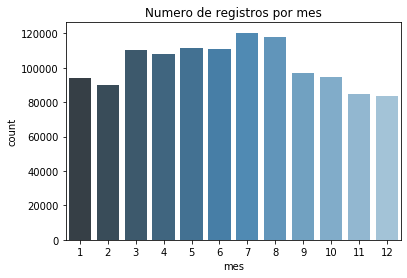

In [5]:
ax = sns.countplot(x="mes", data=df_consejos, palette="Blues_d")
plt.title("Numero de registros por mes")

- Los numeros del eje x representan los nombres de los meses y estan ordenados de enero (1) a diciembre (12).

- Se puede observar como desde octubre a febrero el numero de comentarios es mas bajo de lo normal posiblemente porque en invierno la gente salga menos a distintos sitios y por lo tanto dejen menos comentarios.

- Se puede observar que en julio y agosto hay un pico significativo en los comentarios posiblemente porque en verano la gente tiene mas tiempo libre y hace mejor clima para salir a distintos sitios y dejar mas comentarios.

### Numero de comentarios por dia

Text(0.5, 1.0, 'Numero de registros por dia')

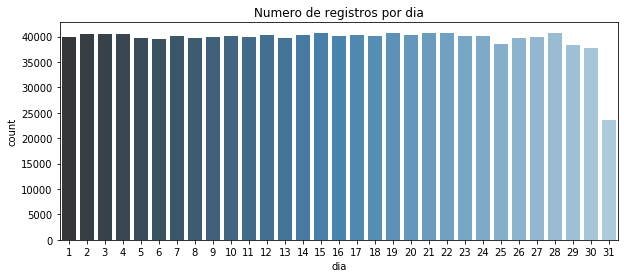

In [6]:
fig=plt.figure(figsize=(10,4))
ax = sns.countplot(x="dia", data=df_consejos, palette="Blues_d")
plt.title("Numero de registros por dia")

-Se puede ver como los dias no influye en el numero de comentarios ya que no hay grandes variaciones.

-Al final los valores de los comentarios por dia decaen ya que no todos los meses tienen 31 dias.

### Numero de comentarios por hora

Text(0.5, 1.0, 'Numero de registros por hora')

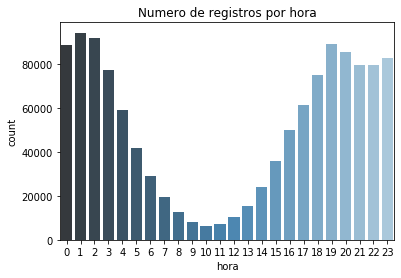

In [7]:
fig=plt.figure(figsize=(6,4))
ax = sns.countplot(x="hora", data=df_consejos, palette="Blues_d")
plt.title("Numero de registros por hora")

- Se puede ver claramente como hay una tendencia clara a dejar comentarios a ciertas horas. Esta tendencia corresponde con las horas de descanso en el país en el que se realiza el uso. La hora esta ajustada a UTC+0 por lo que no se corresponde con las horas reales de uso, pero sí la tendencia.

- Este gráfrico tambien se puede comparar con el de registros por hora de usuarios. Se sigue la misma distribución, de nuevo, por la misma razón, el uso de la plataforma en las horas más normales.

### Numero de comentarios por minuto

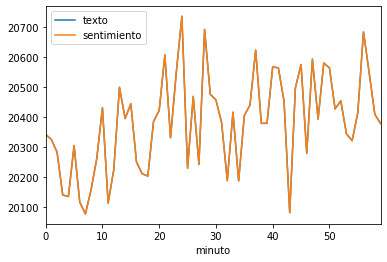

In [8]:
gk=df_consejos.drop(['mes','anyo','num_likes','hora','negocio_id','usuario_id','dia'],axis=1)
gk.groupby('minuto').count().plot()

-Se puede apreciar una funcion con muchos altibajos que no varia mucho ya que el maximo es 20700 y el minimo 20100 esto supone solo una diferencia de 600 para valores de 20000. Por lo tanto los minutos no son relevantes a la hora de analizar los comentarios lo cual tiene sentido ya que las personas no se fijan en una medida de tiempo tan pequeña para dejar comentarios.

## ANALISIS DE USUARIOS

En este momento esto no nos sirve para nada, pero si juntamos dataset de consejos y usuarios, podriamos ver las características de los usuarios que más comentan.

In [9]:
df_consejos.groupby('usuario_id').count().sort_values(['texto'], ascending=False).head(10)['texto']

usuario_id
mkbx55W8B8aPLgDqex7qgg    2439
CxDOIDnH8gp9KXzpBHJYXw    1598
6ZC-0LfOAGwaFc5XPke74w    1509
0tvCcnfJnSs55iB6mqPk3w    1376
eZfHm0qI8A_HfvXScwIYsg    1352
O8eDScRAg6ae0l9Bc24uMA    1255
8DGFWco9VeBAxjqsuh1aSw    1178
WJKocp9RE0KatUwh3_DkGg    1161
2EuPAGalYnP7eSxPgFCNDg    1154
QPJJohtGqkMkaN0Gt3TRIg    1017
Name: texto, dtype: int64

Ahora vamos a obtener los usuarios que más comentarios negativos o positivos dejan, con estos datos también podríamos ver en el dataset de usuarios que tipo de usuarios son.

In [10]:
negativos = df_consejos[df_consejos['sentimiento'] == -1].groupby(['usuario_id']).count().sort_values(['texto'], ascending=False).head(10)['texto'].index
df_consejos[df_consejos['sentimiento'] == -1].groupby(['usuario_id']).count().sort_values(['texto'], ascending=False).head(10)['texto']

usuario_id
mkbx55W8B8aPLgDqex7qgg    150
8DGFWco9VeBAxjqsuh1aSw    108
sCbcImu1yyzncjWN7L9hXA    101
0ygWZ_gXF8qTm0bY95JJqA     94
O8eDScRAg6ae0l9Bc24uMA     91
6ZC-0LfOAGwaFc5XPke74w     85
eZfHm0qI8A_HfvXScwIYsg     81
CxDOIDnH8gp9KXzpBHJYXw     81
5dKknvq65x-SaluuJjT0Kw     73
0tvCcnfJnSs55iB6mqPk3w     73
Name: texto, dtype: int64

In [11]:
positivos = df_consejos[df_consejos['sentimiento'] == 1].groupby(['usuario_id']).count().sort_values(['texto'], ascending=False).head(10)['texto'].index
df_consejos[df_consejos['sentimiento'] == 1].groupby(['usuario_id']).count().sort_values(['texto'], ascending=False).head(10)['texto']

usuario_id
mkbx55W8B8aPLgDqex7qgg    1008
6ZC-0LfOAGwaFc5XPke74w     632
O8eDScRAg6ae0l9Bc24uMA     615
WJKocp9RE0KatUwh3_DkGg     613
QPJJohtGqkMkaN0Gt3TRIg     606
CxDOIDnH8gp9KXzpBHJYXw     547
eZfHm0qI8A_HfvXScwIYsg     546
tQPk4JiBPsx7NSIDbW49Vg     462
uG35h72BAMutvXAWdRpqCQ     446
A0j21z2Q1HGic7jW6e9h7A     427
Name: texto, dtype: int64

A primera vista no se puede obtener ninguna conclusión importante, pero sí será interesante ver quienes son estos usuarios, cuantos seguidores tienen, si han sido expertos... etc. Algo que si se puede ver en los datos anteriores es que algunos de los usuarios que más comentan son también los que más comentan de forma positiva y negativa, tiene sentido ya que comentarán aquello que se encuentren, pero si encontrasemos un usuario que solo comenta de forma negativa, podríamos detectar 'haters'. Hemos recogido los 10 usuarios con más comentarios negativos, los 10 con más positivos, la diferencia entre esas listas nos podría indicar posibles haters (o simplemente usuarios que suelen usar los comentarios para decir cosas negativas).

In [12]:
negativos = negativos.tolist()
positivos = positivos.tolist()

In [13]:
result = list(set(negativos) - set(positivos))
result

['8DGFWco9VeBAxjqsuh1aSw',
 '0tvCcnfJnSs55iB6mqPk3w',
 '0ygWZ_gXF8qTm0bY95JJqA',
 'sCbcImu1yyzncjWN7L9hXA',
 '5dKknvq65x-SaluuJjT0Kw']

In [14]:
df_users = pd.read_csv('Dataset/datos_users_limpio.csv')


In [15]:
pd.set_option('display.max_columns', 500)

df_users[df_users['usuario_id'].isin(result)]

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,anyo_reg,mes_reg,dia_reg,hora_reg
10592,0tvCcnfJnSs55iB6mqPk3w,Daniel,1232,11432,6402,9669,"2012,2013,2014,2015,2016,2017,2018","nCLrbxT009k8z3mQXZ1M9g, 5I6-yegWr4p1mtUMwNkVtg...",1170,177,3.62,783,214,136,46,10,744,1737,2066,2066,995,895,2011,2,6,16
28173,0ygWZ_gXF8qTm0bY95JJqA,Cris,541,950,489,222,Ninguno,"vv52_GpRV1sndRycoreLQg, XylT12exfdLiI_3uDLVIpw...",69,23,2.66,2,5,0,0,0,26,15,12,12,4,2,2009,8,22,16
165302,8DGFWco9VeBAxjqsuh1aSw,Kurdy,336,2164,1594,1747,"2010,2011,2012,2013,2014,2015,2016,2017","JezC_omjXuXp2AE3QHxWZA, 3_Xrok7pV_MNBHhCPy2hgg...",1354,88,4.05,599,36,32,12,9,222,718,600,600,166,134,2009,4,6,23
191613,5dKknvq65x-SaluuJjT0Kw,John,10,107,52,51,Ninguno,"l6_yUOxdIQDIP9qCkMNowQ, eA8WqJj_15lWURDwE6DsKQ...",115,21,2.75,27,5,3,1,0,40,48,65,65,8,83,2011,2,23,20
192245,sCbcImu1yyzncjWN7L9hXA,Adam,50,63,20,14,Ninguno,"3xwdLRJRRAPZ7G-pFbG6Eg, H8ioT8d48-xsLa4GqIOG5g...",154,4,4.19,4,2,0,0,0,7,13,9,9,5,0,2011,1,9,21


No podemos obtener conclusiones muy grandes sobre este último análisis ya que no se hay hecho de forma profunda y el objetivo tampoco está muy bien definido. Pero en la impresión de usuarios de encima podemos ver algunos datos que llaman la atención, por ejmplo que 3 de los usuarios han dado de media una puntuación baja, que tiene sentido si pensamos que son usuarios con una cantidad grande de consejos negativos. Por otro lado, son usuarios extraños ya que tienen pocos seguidores pero dos de ellos han sido expertos bastantes años, probablmeente por tener una red de amigos grande.

## ANALISIS DE NEGOCIOS

De nuevo, en este momento esto no nos sirve para nada, pero si juntamos dataset de consejos y negocios, podríamos ver las características de los negocios más comentados.
Obtenemos los 10 negocios con una mayor cantidad de comentarios:

In [16]:
df_consejos.groupby('negocio_id').count().sort_values(['texto'], ascending=False).head(10)['texto']

negocio_id
FaHADZARwnY4yvlvpnsfGA    3614
JmI9nslLD7KZqRr__Bg6NQ    2440
DkYS3arLOhA8si5uUEmHOw    1503
5LNZ67Yw9RD6nf4_UhXOjw    1487
K7lWdNUhCbcnEvI0NhGewg    1386
hihud--QRriCYZw1zZvW4g    1371
RESDUcs7fIiihp38-d6_6g    1264
4JNXUYY8wbaaDmk3BPzlWw    1121
yfxDa8RFOvJPQh0rNtakHA    1117
iCQpiavjjPzJ5_3gPD5Ebg    1105
Name: texto, dtype: int64

Al igual que con los usuarios, sería interesante obtener los 10 negocios con mas comentarios negativos, los 10 negocios con más positivos y al hacer la diferencia obtener aquellos negocios que tienen muchos comentarios pero la mayoria son negativos. Tambien lo podemos hacer a la inversa para obtener aquellos con más comentarios pero la mayoria sean positivos.

In [17]:
# Se obtienen los negativos
negativos = df_consejos[df_consejos['sentimiento'] == -1].groupby(['negocio_id']).count().sort_values(['texto'], ascending=False).head(10)['texto'].index
df_consejos[df_consejos['sentimiento'] == -1].groupby(['negocio_id']).count().sort_values(['texto'], ascending=False).head(10)['texto']

negocio_id
FaHADZARwnY4yvlvpnsfGA    296
JmI9nslLD7KZqRr__Bg6NQ    181
DkYS3arLOhA8si5uUEmHOw    121
f4x1YBxkLrZg652xt2KR5g    120
iCQpiavjjPzJ5_3gPD5Ebg    117
g8OnV26ywJlZpezdBnOWUQ    106
yfxDa8RFOvJPQh0rNtakHA    106
K7lWdNUhCbcnEvI0NhGewg    104
DN0b4Un8--Uf6SEWLeh0UA     89
yQab5dxZzgBLTEHCw9V7_w     80
Name: texto, dtype: int64

In [18]:
# Se obtienen los positivos
positivos = df_consejos[df_consejos['sentimiento'] == 1].groupby(['negocio_id']).count().sort_values(['texto'], ascending=False).head(10)['texto'].index
df_consejos[df_consejos['sentimiento'] == 1].groupby(['negocio_id']).count().sort_values(['texto'], ascending=False).head(10)['texto']

negocio_id
hihud--QRriCYZw1zZvW4g    1215
FaHADZARwnY4yvlvpnsfGA     963
JmI9nslLD7KZqRr__Bg6NQ     747
DkYS3arLOhA8si5uUEmHOw     674
5LNZ67Yw9RD6nf4_UhXOjw     665
4JNXUYY8wbaaDmk3BPzlWw     656
K7lWdNUhCbcnEvI0NhGewg     623
RESDUcs7fIiihp38-d6_6g     618
eoHdUeQDNgQ6WYEnP2aiRw     551
UPIYuRaZvknINOd1w8kqRQ     481
Name: texto, dtype: int64

In [19]:
negativos = negativos.tolist()
positivos = positivos.tolist()

In [20]:
# Esta es la diferencia, es decir, los negocios con más comentarios negativos sin tener muchos positivos
result = list(set(negativos) - set(positivos))
result

['yfxDa8RFOvJPQh0rNtakHA',
 'iCQpiavjjPzJ5_3gPD5Ebg',
 'DN0b4Un8--Uf6SEWLeh0UA',
 'f4x1YBxkLrZg652xt2KR5g',
 'yQab5dxZzgBLTEHCw9V7_w',
 'g8OnV26ywJlZpezdBnOWUQ']

## ANALISIS LIKES

El numero de likes que tienen los comentarios sigue distribuciones muy similares a las de los comentarios por lo tanto a no ser que haya excepciones las explicaciones son las mismas.

## Numero de likes por año

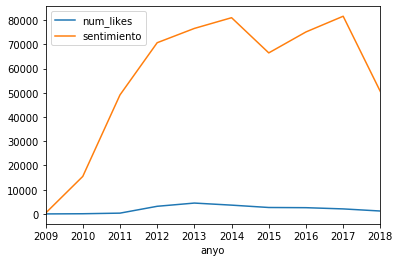

In [21]:
glikes=df_consejos.drop(['mes','dia','hora','minuto','texto','negocio_id','usuario_id'],axis=1)
glikes.groupby('anyo').sum().plot()


- Al igual que con el número de comentarios, se puede ver que la mayor cantidad de likes se recibieron en los años 2012, 2013... etc. 

## Numero de likes por Mes

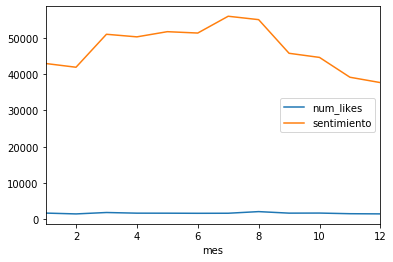

In [22]:
glikes=df_consejos.drop(['anyo','dia','hora','minuto','texto','negocio_id','usuario_id'],axis=1)
glikes.groupby('mes').sum().plot()

- Al igual que con los comentarios, los meses de mayor uso de la plataforma son los meses de verano o de vacaciones.

## Numero de likes por Hora

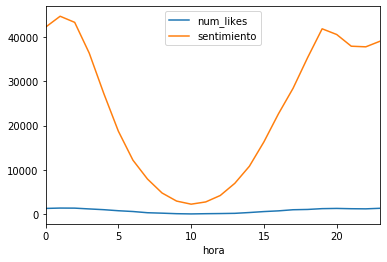

In [23]:
glikes=df_consejos.drop(['mes','anyo','dia','minuto','texto','negocio_id','usuario_id'],axis=1)
glikes.groupby('hora').sum().plot()

Sin ninguna novedad, este grafico nos vuelve a indicar las horas de uso de la plataforma.

## Boxplot
Acontinuacion se pasara a analizar las estadisticas del numero de likes de los comentarios en funcion de los distintos meses. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2abf1c518>,
      dtype=object)

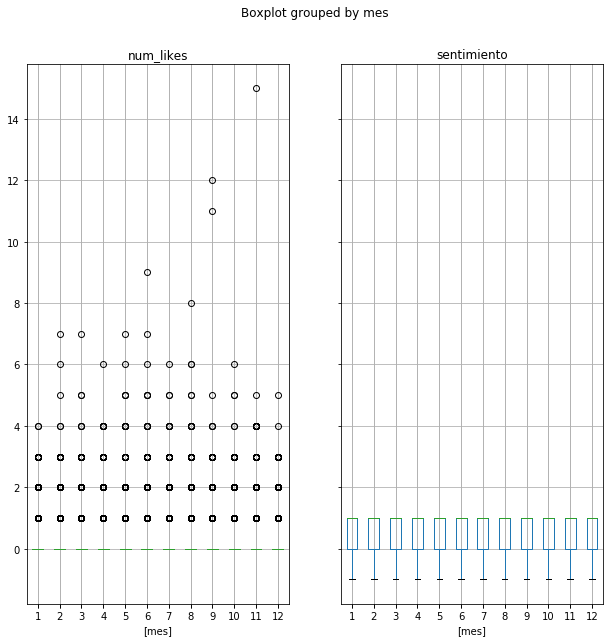

In [24]:
boxplot_consejos=df_consejos.drop(['texto','anyo','hora','negocio_id','usuario_id','dia','minuto'],axis=1)
boxplot_consejos.boxplot(by="mes", figsize=(10,10))


En el anterior boxplot que muestra la informacion de los likes que tienen los comentarios se puede ver que la mayoria de likes estan acumulados en 0 que es donde estan todos los boxplot. El resto de valores son puntos atipicos que se salen de la media y por lo tanto no se puede sacar informacion relevante de ellos.

Para poder tratar de analizar los demas comentarios la distribucion que siguen vamos a eliminar de la base todos los comentarios que tienen 0 likes

         num_likes          mes  sentimiento
count  1715.000000  1715.000000  1715.000000
mean      2.279883     6.449563     0.275802
std       0.808955     3.439287     0.642952
min       2.000000     1.000000    -1.000000
25%       2.000000     3.000000     0.000000
50%       2.000000     7.000000     0.000000
75%       2.000000     9.000000     1.000000
max      15.000000    12.000000     1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2a8928da0>,
      dtype=object)

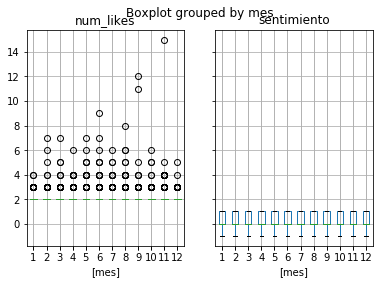

In [25]:
boxplot_consejos=df_consejos.drop(df_consejos[df_consejos.num_likes <= 1].index)

boxplot_consejos=boxplot_consejos.drop(['texto','anyo','hora','negocio_id','usuario_id','dia','minuto'],axis=1)
print(boxplot_consejos.describe())
boxplot_consejos.boxplot(by='mes')

Se puede ver como el problema persiste con comentarios superiores a 0 likes por lo que se tratara de filtrar los comentarios por un numero de likes mas elevado

       num_likes        mes  sentimiento
count   86.00000  86.000000    86.000000
mean     4.94186   6.779070     0.186047
std      1.83017   2.928164     0.694713
min      4.00000   1.000000    -1.000000
25%      4.00000   5.000000     0.000000
50%      4.00000   7.000000     0.000000
75%      5.00000   9.000000     1.000000
max     15.00000  12.000000     1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2a85dd940>,
      dtype=object)

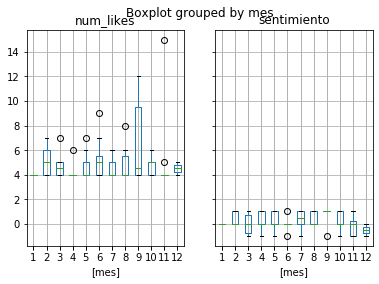

In [26]:
boxplot_consejos=df_consejos.drop(df_consejos[df_consejos.num_likes <= 3].index)

boxplot_consejos=boxplot_consejos.drop(['texto','anyo','hora','negocio_id','usuario_id','dia','minuto'],axis=1)
print(boxplot_consejos.describe())
boxplot_consejos.boxplot(by='mes')

-El numero de comentarios que tienen 3 o mas likes es solamente de 86 en comparacion con los 1.2 millones de comentarios por lo que no supone un gran numero.


*Posible ampliacion sacando 100 negocios y su evolucion por año*

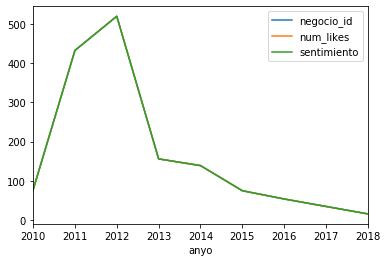

In [27]:
gk=df_consejos.drop(['texto','mes','hora','minuto','usuario_id','dia'],axis=1)
gk[gk.negocio_id=='DkYS3arLOhA8si5uUEmHOw'].groupby(['anyo']).count().plot()

## Wordcloud en consejos

In [28]:
df_consejos

,usuario_id,negocio_id,texto,num_likes,anyo,mes,dia,hora,minuto,sentimiento
0,UPw5DWs_b-e2JRBS-t37Ag,VaKXUpmWTTWDKbpJ3aQdMw,"Great for watching games, ufc, and whatever el...",0,2014,3,27,3,51,1
1,Ocha4kZBHb4JK0lOWvE0sg,OPiPeoJiv92rENwbq76orA,Happy Hour 2-4 daily with 1/2 price drinks and...,0,2013,5,25,6,0,0
2,jRyO2V1pA4CdVVqCIOPc1Q,5KheTjYPu1HcQzQFtm4_vw,Good chips and salsa. Loud at times. Good serv...,0,2011,12,26,1,46,0
3,FuTJWFYm4UKqewaosss1KA,TkoyGi8J7YFjA6SbaRzrxg,The setting and decoration here is amazing. Co...,0,2014,3,23,21,32,1
4,LUlKtaM3nXd-E4N4uOk_fQ,AkL6Ous6A1atZejfZXn1Bg,Molly is definately taking a picture with Sant...,0,2012,10,6,0,19,0
...,...,...,...,...,...,...,...,...,...,...
1223085,nus5X9JKgU_SzfAL4vhJrg,qdwwiRKwnhdlr9QcgJuzbg,"Very good class, great instructor!!",0,2018,8,5,20,58,1
1223086,95wqYGU6-OiHqRPZP0uAWw,wrs4Zbz17q_G49AIRxRPVw,Excellent food,0,2018,8,15,18,5,1
1223087,HtLaONYabidSxMS1eGHcXA,wEc4JE2NYQr1RnGjGr4q7w,Jess is the best bartender!! Go check her out!,0,2018,10,2,3,34,1
1223088,T4R5ZKfcGt1GIAgjCh67eA,n5Hc_iMVkyxcS0SXiBCbOQ,Excellent food and AMAZING service by Anneliese!!,0,2018,10,13,16,57,1


In [29]:
numConsejos = 1000

listBad = df_consejos[df_consejos['sentimiento'] == -1]['texto'].tolist()[:numConsejos]
listGood = df_consejos[df_consejos['sentimiento'] == 1]['texto'].tolist()[:numConsejos]

listBad = [linea + ' ' for linea in listBad]
listGood = [linea + ' ' for linea in listGood]

In [30]:
textBad = ''.join(listBad)
textGood = ''.join(listGood)

In [31]:
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator

char_mask_bad = np.array(Image.open("Imagen/darthvader.jpg"))
image_colors_bad = ImageColorGenerator(char_mask_bad)

char_mask_good = np.array(Image.open("Imagen/yoda.jpg"))
image_colors_good = ImageColorGenerator(char_mask_good)

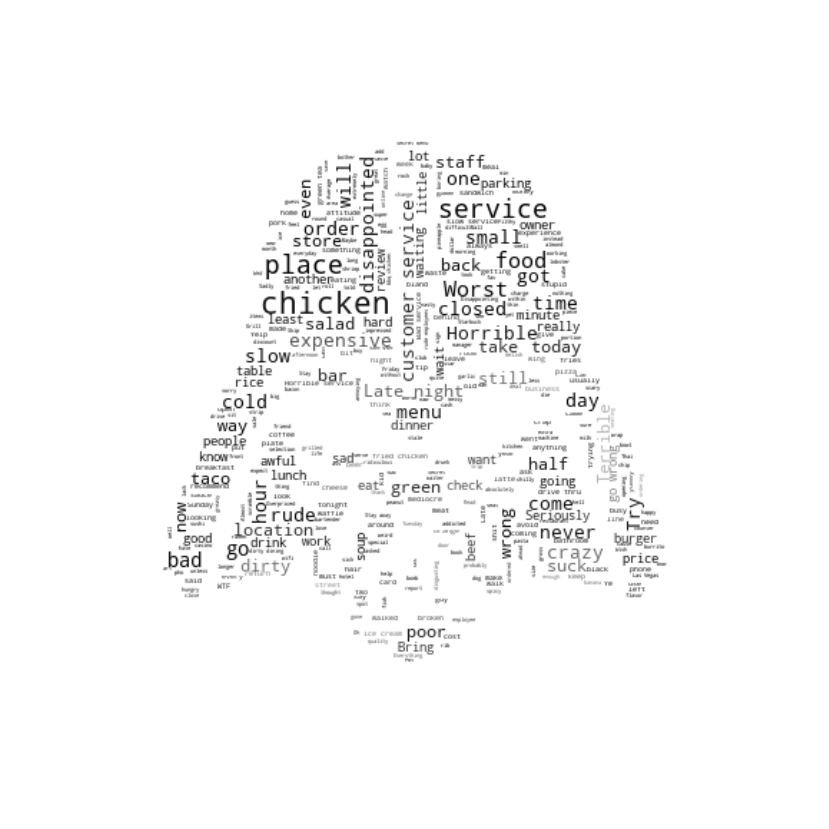

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color = "white", max_words=500, width=100, height=100, mask=char_mask_bad, random_state=1).generate(textBad)

plt.figure(figsize=(15, 15))
plt.axis('off')

plt.imshow(wc.recolor(color_func=image_colors_bad),interpolation="bilinear")

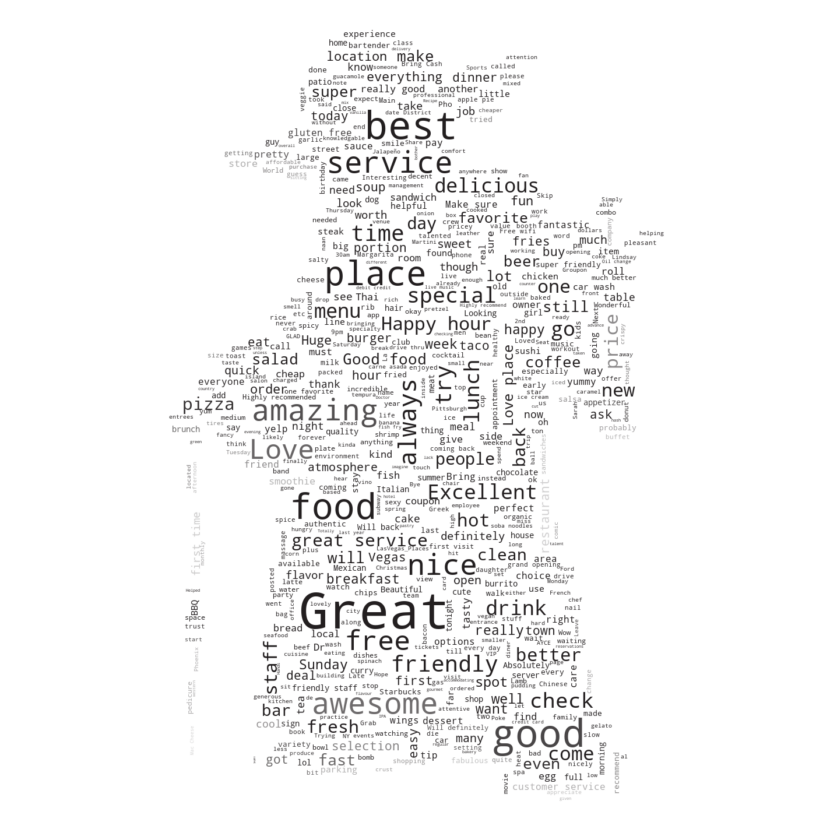

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color = "white", max_words=600, width=100, height=100, mask=char_mask_good, random_state=1).generate(textGood)

plt.figure(figsize=(15, 15))
plt.axis('off')

plt.imshow(wc.recolor(color_func=image_colors_good),interpolation="bilinear")

Para entender más correctamente cuál es el contenido de los consejos, los hemos separado en los que se supone que son malos y los que son buenos según el análisis de sentimiento hecho anteriormente. Para ello, hemos utilizado **Procesamiento de Lenguaje Natural** y **Text Mining** de forma muy **superficial**; no hemos aplicado Stopwords, no hemos filtrado caracteres especiales y tampoco hemos aplicado Stemming. Sin embargo, aun no habiendo aplicado estas técnicas, los resultados arrojados por los dos wordcloud son lo suficientemente buenos como para hacernos una idea del contenido de los consejos. 

Se pueden hacer algunas observaciones útiles a partir de los wordcloud:

- En el **wordcloud negativo**, muchas de las **palabras más frecuentes son negativas**. Algunos ejemplos son **"worst"**, **"horrible"**, **"slow"**, **"bad"**, **"poor"**, etc... También hay algunas palabras que pueden ser errores del algoritmo como "Good", pero aparecen en menor medida. En el caso del **wordcloud positivo**, ocurre exactamente lo contrario, hay muchas **palabras positivas**. Algunos ejemplos son **"Great"**, **"free"**, **"good"**, etc... En este caso, los errores producidos por el algoritmo son menores.


- Algo que llama la atención bastante es que en el **wordcloud negativo**, la palabra más frecuente es **chicken**. Esto puede ser un fallo en al preparación de los datos. Otra opción es que la mayoría de los restaurantes en los que se vende pollo sean malos y, por lo tanto, tengan una cantidad de consejos con connotaciones negativas muy altas. Esto produciría que la palabra chicken saliera numerosas veces catalogada como mala.


- La palabra "food" aparece bastante grande en el wordcloud, por lo que podríamos deducir que normalmente estos negocios son los que consejos más positivos tienen.


Para averiguar por qué aparece "chicken" como palabra frecuente en consejos negativos, vamos a comprobar los consejos que contienen esta palabra.

In [34]:
df_consejosNegativos = df_consejos[df_consejos['sentimiento'] == -1][['negocio_id', 'texto']]
df_consejosNegativos

,negocio_id,texto
5,kj1p6NwUGROOoqNySf0I1Q,It's true! The drunken noodles are outrageous!
8,YCRCFBr6myPS49on2aS2pQ,Sat in the drive thru this afternoon for 30 mi...
24,7sPNbCx7vGAaH7SbNPZ6oA,Late night burger cravings...
51,6sKaAF8WhWyyCjfZr2Rfsg,Last time... =(
59,E9aC5bLfXdQVZ5csvLuLJg,Green papaya salad not good. Papaya sliced to...
...,...,...
1223026,DVfCbJhJUDWRlUfrKzaKOA,Don't ever buy their charsiu/bbq pork or their...
1223042,Lmqj8Me1EiYljYj0N1W7JA,Patio only open until 11 PM due to residences ...
1223043,h7LFuLPpjPwJAxX3HHJY1w,This is the worst place to go to ever! Went he...
1223052,TfcQhrjJco0C_x0KVK7LwA,They have the pac 12 network so I never have t...


In [35]:
# df_consejosNegativos[df_consejosNegativos['texto'].find('chicken')]

def preprocesa(x):
    if "chicken" in str(x):
        print(x)

consejosChicken = df_consejosNegativos['texto'].apply(lambda x: preprocesa(x))

Everything on the menu is fabulous! Never had a bad meal. Try the chicken enchiladas or rotisserie chicken salad.
Mock chicken in the bowls is bomb!
Try the Jidori chicken breast.
Mmm tequila lime chicken pasta
inexpensive and tasty! get the  Three Flavor Grill Salmon, pineapple fried rice, and orange chicken
99 cent chicken tacos on Wednesdays. Limit 12 per person.
Still a raving fan of fried chicken and waffles after all these brunches!
Fried chicken wings or bust.
I cannot believe this. Everytime I get the chicken pasta salad they DO NOT include the dressing. WHY.
Halal certified and DOES still serve Halal chicken
Gaeng Kua Gai (curry chicken!)
Chicken pad thai was quite yummy. Hubby had bbq chicken. Very greasy, but also yummy.
20 piece chicken nuggets before work. Nom nom nom.
Made it in time for the lunch menu! BBQ chicken, spareribs and garlic short ribs! YUM and it's 6.25 each! That's a deal!
A variety of fish, chicken, wings, and shrimp
Get the egg white scramble with chicken,

Always check your drive thru order.  An eight piece regular chicken meal means whatever they have left.  Five thighs, two drumsticks and a breast.  That's one strange chicken! They also forgot some other food we ordered.
Can't go wrong with spicy chicken or Teriyaki beef
Do not order chicken.
Lots of food. Don't order the seafood thali for lunch, just one small shrimp entree difference with chicken thali - not worth the $15 price tag.
The egg and chicken sausage, hold the wrap hold the rice.
Five spice fried chicken is the bomb!
Order 3 piece chicken and 1/2 rack rib with rice, steamed veggies and macaroni and cheese is enough for a family of four
Combo platter. Pork shoulder , pulled chicken , chopped, ham,beef and pork rib, beef rib.  Two sides and cornbread.
Sa-cha chicken n the crab rangoons= blazing
Some of the worst Indian ever. Rubber chicken. Rubber salad. Sauce greasy and with no kick. Line up to get in. Line up to pay.
Get the Chipotle chicken!
gonna make chicken katsu curry!

Como podemos observar en los consejos, parece ser que existe un error con la palabra "chicken" puesto que la mayoría de los consejos que la contienen parece que tienen una connotación positiva. De esto podemos deducir que NO podemos decir que las tiendas que venden pollo sean las peores. Aun teniendo estos errores, los resultados arrojados por los wordcloud siguen siendo lo **suficientemente buenos y representativos**.